In [18]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [19]:
companies = pd.read_csv('1000_Companies.csv')
#extracting independent and dependent variables
x = companies.iloc[:, :-1].values  # Keep all numeric features
y = companies.iloc[:, -1].values  # Profit remains as target variable
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

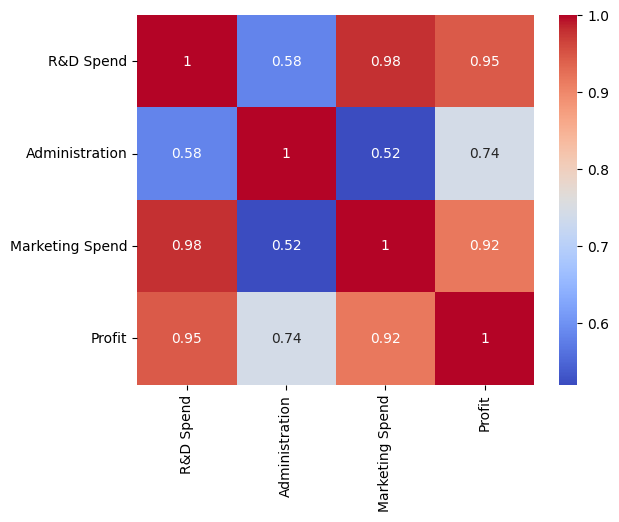

In [20]:
sns.heatmap(companies.drop(['State'], axis=1).corr(), annot=True, cmap='coolwarm')


In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Label encode the 'State' column
labelEncoder = LabelEncoder()
x[:, 3] = labelEncoder.fit_transform(x[:, 3])  # Convert categorical to numeric labels

# Apply OneHotEncoder correctly
columnTransformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough'
)

x = np.array(columnTransformer.fit_transform(x))  # Convert to NumPy array

print(x)


[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 ...
 [1.0 0.0 0.0 100275.47 241926.31 227142.82]
 [1.0 0.0 0.0 128456.23 321652.14 281692.32]
 [0.0 0.0 1.0 161181.72 270939.86 295442.17]]


In [ ]:
x = x[:, 1:]  # Avoiding the dummy variable trap by removing the first column of the one-hot encoded variables

In [26]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [28]:
y_pred = regressor.predict(x_test)
y_pred

array([ 89790.61532916,  88427.07187361,  94894.67836972, 175680.8672561 ,
        83411.73042089, 110571.90200074, 132145.2293644 ,  91473.37719686,
       164597.05380606,  53222.82667401,  66950.1905099 , 150566.43987005,
       126915.20858596,  59337.8597105 , 177513.91053061,  75316.28143051,
       118248.14406603, 164574.40699902, 170937.2898107 , 182069.11645084,
       118845.03252689,  85669.95112229, 180992.59396143,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669091,  56881.41475224,
        68896.39346905, 210040.00765883, 120778.72270894, 111724.87157654,
       101487.90541518, 137959.02649624,  63969.95996743, 108857.91214126,
       186014.72531988, 171442.64130747, 174644.26529205, 117671.49128196,
        96731.37857433, 165452.25779409, 107724.34331255,  50194.54176913,
       116513.89532179,  58632.48986821, 158416.4682761 ,  78541.4852161 ,
       159727.66671743, 131137.87699644, 184880.70924516, 174609.0826688 ,
        93745.66352059,  

In [29]:
print(regressor.coef_)

[ 5.26235224e+02 -3.54301375e+02 -1.71933849e+02  5.25845857e-01
  8.44390881e-01  1.07574255e-01]


In [30]:
print(regressor.intercept_)

-51561.464947773784


In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112695892268761